In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os


In [2]:
data = pd.read_csv("breast-cancer.csv")


In [3]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1}).astype(float)
X = data.drop(["diagnosis"], axis=1)
y = data.diagnosis.values


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


In [5]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.score(x_test, y_test)


0.631578947368421

In [6]:
from sklearn import metrics
y_pred_LR_train = logisticRegr.predict(x_train)
y_pred_LR_test = logisticRegr.predict(x_test)

print("Testing Accuracy for Logistic Regression Model:",
      metrics.accuracy_score(y_test, y_pred_LR_test))
print("Training Accuracy for Logistic Regression Model:",
      metrics.accuracy_score(y_train, y_pred_LR_train))


Testing Accuracy for Logistic Regression Model: 0.631578947368421
Training Accuracy for Logistic Regression Model: 0.6263736263736264


<AxesSubplot:>

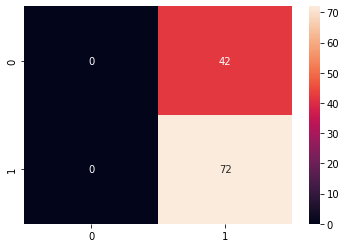

In [7]:

from sklearn.metrics import confusion_matrix


y_pred_LR_train = logisticRegr.predict(x_train)
y_pred_LR_test = logisticRegr.predict(x_test)


cm = confusion_matrix(y_test, y_pred_LR_test)
sns.heatmap(cm, annot=True)
#dataset imbalance


In [8]:
#Neural Net
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300,
                   activation='relu', solver='adam', random_state=1)
nn.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [9]:
from sklearn import metrics

print("Testing Accuracy for Neural Net Model:",
      metrics.accuracy_score(y_test, nn.predict(x_test)))
print("Training Accuracy for Neural Net Model:",
      metrics.accuracy_score(y_train, nn.predict(x_train)))


Testing Accuracy for Neural Net Model: 0.631578947368421
Training Accuracy for Neural Net Model: 0.6263736263736264


[[ 0 42]
 [ 0 72]]


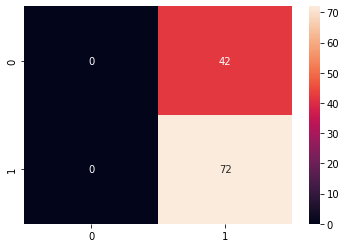

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nn.predict(x_test))
sns.heatmap(cm, annot=True)
print(cm)

#dataset imbalance


In [11]:
#Basic Trees
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
X.shape
# might need to change this number
featsel = ExtraTreesRegressor(n_estimators=50)
featsel = featsel.fit(X, y)
featsel.feature_importances_
model = SelectFromModel(featsel, prefit=True)
X_new = model.transform(X)
X_new.shape


C:\Users\Mansoor\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(569, 8)

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

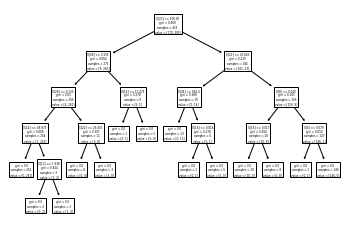

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

btree = tree.DecisionTreeClassifier()

btree = btree.fit(x_train, y_train)

tree.plot_tree(btree)

btree.predict(x_test)


In [13]:
btree.score(x_test, y_test)


0.956140350877193

In [14]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = btree.predict(x_train)
y_pred_test = btree.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Basic Trees Model: ", accuracy_train*100)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Basic Trees Model: ", accuracy_test*100)


Training Accuracy for Basic Trees Model:  100.0
Testing Accuracy for Basic Trees Model:  81.15079365079364


<AxesSubplot:>

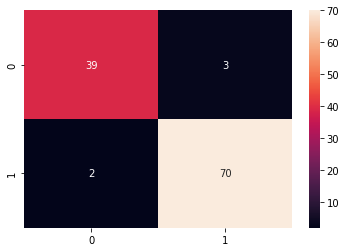

In [15]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from math import sqrt  # For squareroot operation
from sklearn.metrics import mean_squared_error  # For MSE
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_LR_train = btree.predict(x_train)
y_pred_LR_test = btree.predict(x_test)

cm = confusion_matrix(y_test, y_pred_LR_test)
sns.heatmap(cm, annot=True)
